**Import libraries**

In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('english')

**Import the datasets**

In [3]:
file1 = open('author_train.csv', 'rt', encoding='utf-8')
train = file1.read()
file1.close()

**Using regular expression, extract text and author from the dataset**

In [4]:
train_text = re.split(r'",\d', train)
train_text.pop()

',,\n'

In [5]:
train_author = re.findall(r'",\d', train)
train_author = ''.join(train_author)
train_author = re.sub('"','',train_author)
train_author = re.split(',', train_author)
train_author.pop(0)

''

**After extracting text and author from the datasets into List, print the count of text and author which should match with problem description**

In [6]:
print('No. of sample texts in the training set  : ', len(train_text))
print('No. of target values in the training set : ', len(train_author))

No. of sample texts in the training set  :  18977
No. of target values in the training set :  18977


**Create a dataframe of text and author** 

In [7]:
df = pd.DataFrame({'text': train_text})

In [8]:
df['author'] = pd.DataFrame(train_author)

In [9]:
df.head()

,text,author
0,"""They have been pronounced by an\n\n\n\n\nexpe...",2
1,",,\n""His partner sailed along in\n\n\n\n\nfron...",0
2,",,\n""The cushions were a good deal higher\n\n\...",5
3,",,\n""O God, grant that in his presence I may\n...",4
4,",,\n""The grass\n\n\n\n\nglowed with bright and...",0


In [10]:
df['author'].value_counts()

0    3859
5    3517
4    3184
2    2621
3    1314
9    1142
7    1054
8     910
6     755
1     621
Name: author, dtype: int64

**Visualize the count of authors in the training set. This shows that training set is pretty imbalanced**

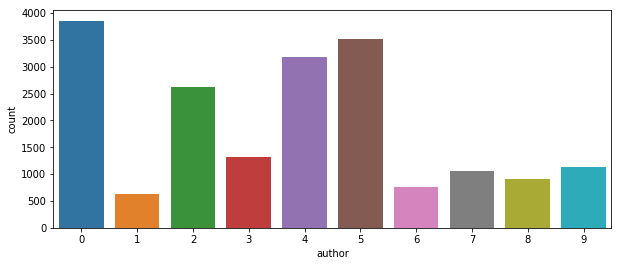

In [11]:
fig = plt.figure(figsize=(10,4))
sns.countplot(x='author',data=df)

**Now, load the test dataset, display top 5 row & no. of sample texts in test set which should match with problem description**

In [12]:
df_test = pd.read_csv('author_test.csv')

In [13]:
df_test.head()

,text
0,What though I was the victim of\r\r\r\r\r\n ...
1,Was ever such a cock-and-bull story in this li...
2,Does Alice appear to be present when she is\r\...
3,She inspired the men she knew\r\r\r\r\r\n ...
4,Instead of\r\r\r\r\r\ngetting hold of man's fr...


In [14]:
print('No. of sample texts in the test set: ', len(df_test))

No. of sample texts in the test set:  6326


In [15]:
df['text'].iloc[0]

'"They have been pronounced by an\n\n\n\n\nexpert to be of a rare variety and of considerable value., You can see\n\n\n\n\nfor yourselves that they are very handsome.""  She opened a flat box as\n\n\n\n\nshe spoke, and showed me six of the finest pearls that I had ever seen.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n""Your statement is most interesting,"" said Sherlock Holmes.  ""Has\n\n\n\n\nanything else occurred to you?""\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n""Yes, and no later than to-day., That is why I have come to you., This\n\n\n\n\nmorning I received this letter, which you will perhaps read for\n\n\n\n\nyourself.""\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n""Thank you,"" said Holmes.  ""The envelope too, please., Postmark,\n\n\n\n\nLondon, S.W., Date, July 7., Hum!  Man\'s thumb-mark on\n\n\n\n\ncorner,—probably postman., Best quality paper., Envelopes at sixpence\n\n\n\n\na packet., Particular man in his stationery.'

In [16]:
df['text'].iloc[6]

',,\n"But why do you ask?, Have\n\n\n\n\n            you stolen something?â\x80\x9d\n\n\n\n\n\n\n\n\n\n            â\x80\x9cI have,â\x80\x9d said Mitya, winking slyly.\n\n\n\n\n\n\n\n\n\n            â\x80\x9cWhat have you stolen?â\x80\x9d inquired Pyotr Ilyitch\n\n\n\n\n            curiously.\n\n\n\n\n\n\n\n\n\n            â\x80\x9cI stole twenty copecks from my mother when I was\n\n\n\n\n            nine years old, and gave it back three days after.â\x80\x9d\n\n\n\n\n\n\n\n\n\n            As he said\n\n\n\n\n            this, Mitya suddenly got up.\n\n\n\n\n\n\n\n\n\n            â\x80\x9cDmitri Fyodorovitch, won\'t you come now?â\x80\x9d\n\n\n\n\n            called Andrey from the door of the shop.\n\n\n\n\n\n\n\n\n\n            â\x80\x9cAre you ready?, We\'ll come!â\x80\x9d Mitya started.\n\n\n\n\n            â\x80\x9cA few more last words andâ\x80\x94Andrey, a\n\n\n\n\n            glass of vodka at starting., Give him some brandy as well! That\n\n\n\n\n            boxâ\x80\x9d (the 

### Data Clearning & Lemmatization

In [17]:
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [18]:
negations_dic1 = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not", "haven't":"have not",
                 "hasn't":"has not","hadn't":"had not","won't":"will not", "wouldn't":"would not", "don't":"do not", 
                 "doesn't":"does not","didn't":"did not", "can't":"can not","couldn't":"could not","shouldn't":"should not",
                 "mightn't":"might not", "mustn't":"must not"}
neg_pattern1 = re.compile(r'\b(' + '|'.join(negations_dic1.keys()) + r')\b')

In [19]:
negations_dic2 = {'isn"t':'is not', 'aren"t':'are not', 'wasn"t':'was not', 'weren"t':'were not', 'haven"t':'have not',
                 'hasn"t':'has not','hadn"t':'had not','won"t':'will not', 'wouldn"t':'would not', 'don"t':'do not', 
                 'doesn"t':'does not','didn"t':'did not', 'can"t':'can not','couldn"t':'could not','shouldn"t':'should not',
                 'mightn"t':'might not', 'mustn"t':'must not'}
neg_pattern2 = re.compile(r'\b(' + '|'.join(negations_dic2.keys()) + r')\b')

In [20]:
def lemma_text(sentence):
    text = sentence.lower()
    text = neg_pattern1.sub(lambda x: negations_dic1[x.group()], text)
    text = neg_pattern2.sub(lambda x: negations_dic2[x.group()], text)
    text = re.sub(r'\s+', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [tok for tok in tokens if tok not in nltk_stopwords and len(tok) > 1]
    lemma_tokens = [lemma.lemmatize(token, pos='n') for token in tokens]
    return ' '.join(lemma_tokens)

In [21]:
df['lemma_text'] = df['text'].apply(lemma_text)

In [22]:
df_test['lemma_text'] = df_test['text'].apply(lemma_text)

In [23]:
df['text'][5]

',,\n"On waking up he had asked for a cutlet, a bottle of\n\n\n\n\nChateau d’Yquem, and some grapes, paper, and ink, and his bill., No one\n\n\n\n\nnoticed anything special about him; he was quiet, gentle, and friendly.\n\n\n\n\nHe must have shot himself at about midnight, though it was strange that\n\n\n\n\nno one had heard the shot, and they only raised the alarm at midday,\n\n\n\n\nwhen, after knocking in vain, they had broken in the door., The bottle of\n\n\n\n\nChateau d’Yquem was half empty, there was half a plateful of grapes left\n\n\n\n\ntoo., The shot had been fired from a little three-chambered revolver,\n\n\n\n\nstraight into the heart., Very little blood had flowed., The revolver had\n\n\n\n\ndropped from his hand on to the carpet., The boy himself was half lying\n\n\n\n\nin a corner of the sofa., Death must have been instantaneous., There was\n\n\n\n\nno trace of the anguish of death in the face; the expression was serene,\n\n\n\n\nalmost happy, as though there were no ca

In [24]:
df['lemma_text'][5]

'`` waking asked cutlet bottle chateau yquem grape paper ink bill. one noticed anything special quiet gentle friendly must shot midnight though strange one heard shot raised alarm midday knocking vain broken door. bottle chateau yquem half empty half plateful grape left too. shot fired little three-chambered revolver straight heart. little blood flowed. revolver dropped hand carpet. boy half lying corner sofa. death must instantaneous. trace anguish death face expression serene almost happy though care life. party stared greedy curiosity'

### Train test split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(df['lemma_text'], df['author'], test_size=0.25, stratify=df['author'],
                                               random_state=75)

In [26]:
print('No. of sample texts X_train: ', len(X_train))
print('No. of sample texts X_cv   : ', len(X_cv))

No. of sample texts X_train:  14232
No. of sample texts X_cv   :  4745


### TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                     ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1)
X_train_tfidf = tf.fit_transform(X_train)
X_cv_tfidf = tf.transform(X_cv)

In [29]:
tf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=1,
        vocabulary=None)

In [30]:
X_cv_tfidf.shape

(4745, 196740)

In [31]:
X_cv_tfidf

<4745x196740 sparse matrix of type '<class 'numpy.float64'>'
	with 957373 stored elements in Compressed Sparse Row format>

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=5, class_weight='balanced')
svm.fit(X_train_tfidf, y_train)
y_pred_class = svm.predict(X_cv_tfidf)

In [34]:
print('LinearSVC accuracy:', accuracy_score(y_cv, y_pred_class))

LinearSVC accuracy: 0.9875658587987355


In [35]:
print('LinearSVC Confusion-Matrix:\n', confusion_matrix(y_cv, y_pred_class))

LinearSVC Confusion-Matrix:
 [[962   0   0   0   2   1   0   0   0   0]
 [  0 148   0   0   0   2   3   1   0   1]
 [  1   0 649   0   1   3   0   0   1   0]
 [  0   0   0 329   0   0   0   0   0   0]
 [ 11   0   1   0 781   1   1   0   0   1]
 [  1   0   3   0   0 875   0   0   0   0]
 [  0   0   0   0   0   0 189   0   0   0]
 [  5   0   2   0   2   5   0 250   0   0]
 [  0   0   1   0   0   3   0   0 222   1]
 [  1   0   1   0   0   3   0   0   0 281]]


In [36]:
print('LinearSVC Classification Report:\n', classification_report(y_cv, y_pred_class))

LinearSVC Classification Report:
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       965
          1       1.00      0.95      0.98       155
          2       0.99      0.99      0.99       655
          3       1.00      1.00      1.00       329
          4       0.99      0.98      0.99       796
          5       0.98      1.00      0.99       879
          6       0.98      1.00      0.99       189
          7       1.00      0.95      0.97       264
          8       1.00      0.98      0.99       227
          9       0.99      0.98      0.99       286

avg / total       0.99      0.99      0.99      4745



#### Now, predict using test set

In [37]:
tf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', 
                     ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1)

X_train_tfidf = tf.fit_transform(df['lemma_text'])
X_test_tfidf = tf.transform(df_test['lemma_text'])

y_train = df['author']

In [38]:
X_train_tfidf.shape

(18977, 271430)

In [39]:
y_train.shape

(18977,)

In [40]:
X_test_tfidf.shape

(6326, 271430)

In [41]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=5, class_weight='balanced')
svm.fit(X_train_tfidf, y_train)
y_pred_class = svm.predict(X_test_tfidf)

In [42]:
submission = y_pred_class.reshape(len(y_pred_class),1).astype(int)

In [43]:
df_sub = pd.DataFrame(data=submission, columns=['author'])

In [44]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
df_sub.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()